In [1]:
import torch
import numpy as np
import cv2
import os
from PIL import Image, ImageOps

import torch.nn as nn
import matplotlib.pyplot as plt
import nibabel as nib

In [2]:
fastica = np.asanyarray(nib.load('/data/users2/yxiao11/model/ICA/mri_data/fastica.nii').dataobj)
ica_kurtosis = np.asanyarray(nib.load('/data/users2/yxiao11/model/ICA/mri_data/kurtosis.nii').dataobj)
icaica1 = np.asanyarray(nib.load('/data/users2/yxiao11/model/ICA/mri_data/icaica1_50.nii').dataobj)
knn = np.asanyarray(nib.load('/data/users2/yxiao11/model/ICA/mri_data/knn.nii').dataobj)
infonce = np.asanyarray(nib.load('/data/users2/yxiao11/model/ICA/mri_data/infonce50.nii').dataobj)
# infonce100 = np.asanyarray(nib.load('/data/users2/yxiao11/model/ICA/mri_data/infonce100.nii').dataobj)
infonce50 = np.asanyarray(nib.load('/data/users2/yxiao11/model/ICA/mri_data/infonce_50.nii').dataobj)

mixture = np.load('/data/users2/yxiao11/model/ICA/mri_data/mixture.npy').T

In [3]:
fastica = fastica.reshape(int(53*63*52), 50)
ica_kurtosis = ica_kurtosis.reshape(int(53*63*52), 50)
icaica1 = icaica1.reshape(int(53*63*52), 50)
knn = knn.reshape(int(53*63*52), 50)
infonce = infonce.reshape(int(53*63*52), 50)
# infonce100 = infonce100.reshape(int(53*63*52), 100)
infonce50 = infonce50.reshape(int(53*63*52), 50)

In [4]:
# infonce50 = infonce50[:, 10:]

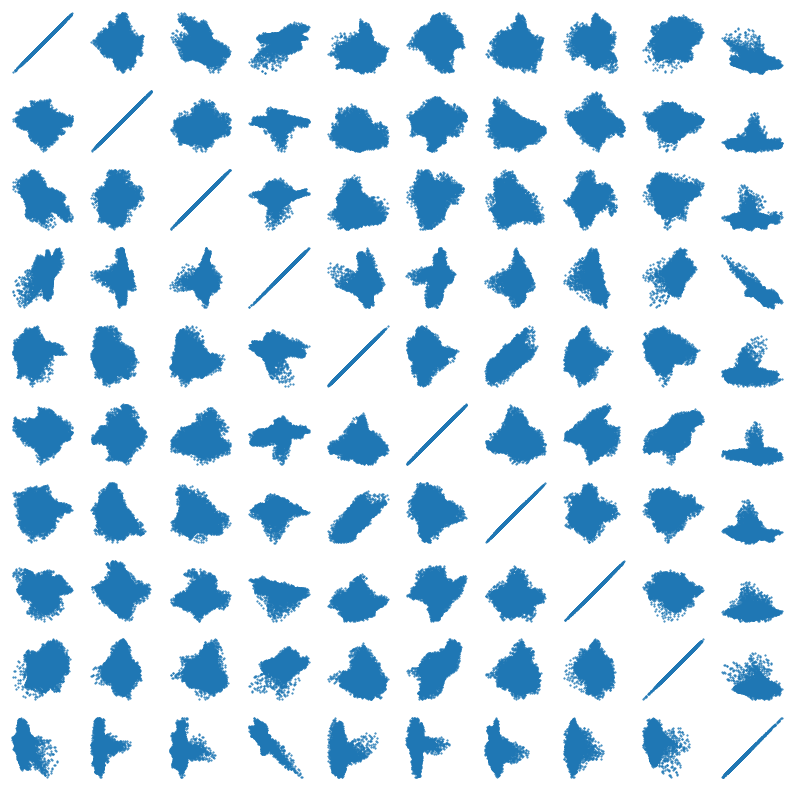

In [5]:
%matplotlib inline
# plt.plot(data[:,0], data[:,1], '.', ms=0.5)
# # plt.axis('square')
plt.figure(figsize=(10,10))
sub_shape = 10
for i in range(sub_shape):
    for j in range(sub_shape):
        plt.subplot(sub_shape, sub_shape, i*sub_shape+j+1)
        plt.plot(infonce50[:, i], infonce50[:, j], '.', ms=1)
        plt.axis('square')
        plt.axis('off')

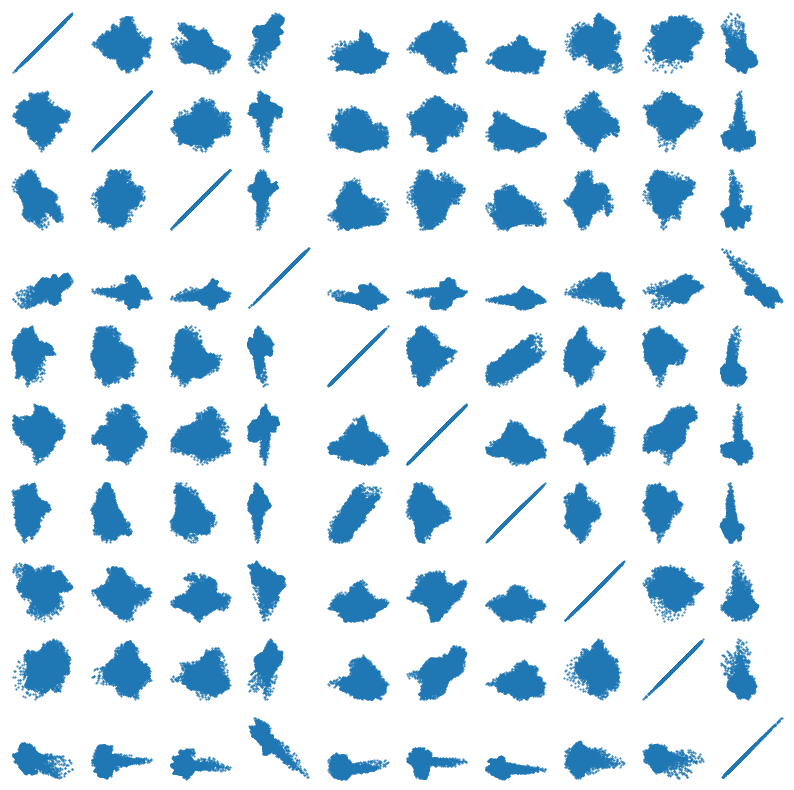

In [85]:
%matplotlib inline
# plt.plot(data[:,0], data[:,1], '.', ms=0.5)
# # plt.axis('square')
plt.figure(figsize=(10,10))
sub_shape = 10
for i in range(sub_shape):
    for j in range(sub_shape):
        plt.subplot(sub_shape, sub_shape, i*sub_shape+j+1)
        plt.plot(infonce[:, i], infonce[:, j], '.', ms=1)
        plt.axis('square')
        plt.axis('off')

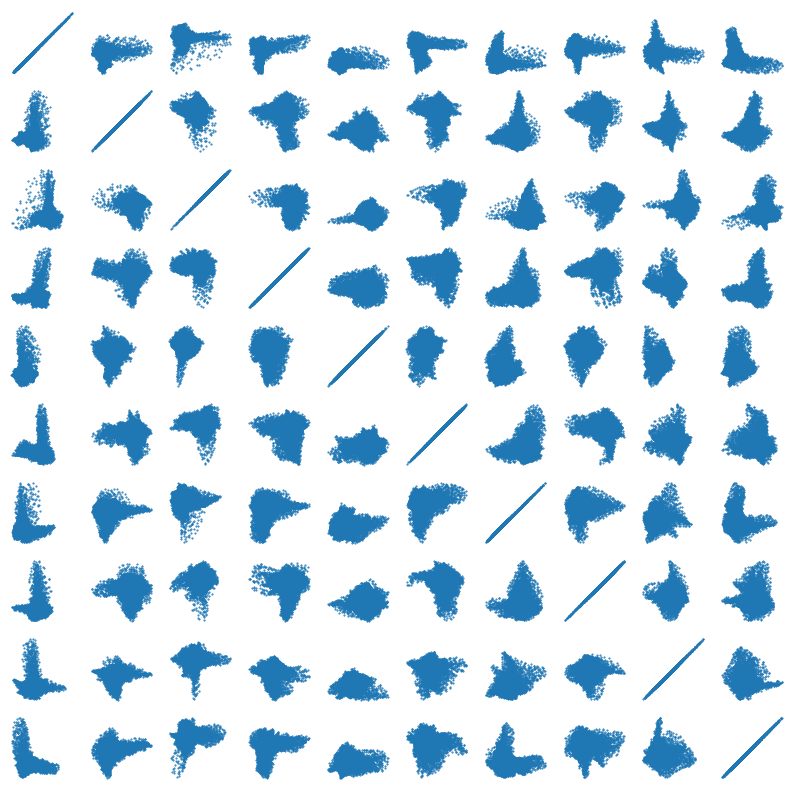

In [47]:
%matplotlib inline
# plt.plot(data[:,0], data[:,1], '.', ms=0.5)
# # plt.axis('square')
plt.figure(figsize=(10,10))
sub_shape = 10
for i in range(sub_shape):
    for j in range(sub_shape):
        plt.subplot(sub_shape, sub_shape, i*sub_shape+j+1)
        plt.plot(icaica1[:, i], icaica1[:, j], '.', ms=1)
        plt.axis('square')
        plt.axis('off')

In [ ]:
%matplotlib inline
# plt.plot(data[:,0], data[:,1], '.', ms=0.5)
# # plt.axis('square')
plt.figure(figsize=(10,10))
sub_shape = 10
for i in range(sub_shape):
    for j in range(sub_shape):
        plt.subplot(sub_shape, sub_shape, i*sub_shape+j+1)
        plt.plot(knn[:, i+1], knn[:, j+1], '.', ms=1)
        plt.axis('square')
        plt.axis('off')

In [ ]:
plt.imshow(np.corrcoef(fastica.T), cmap='gist_heat')

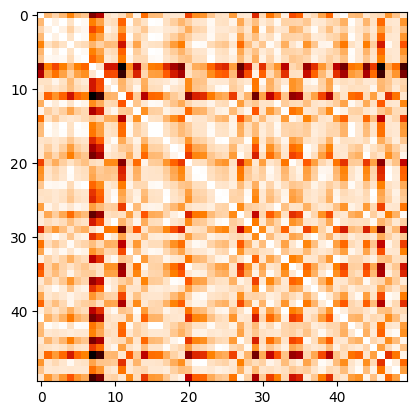

In [14]:
plt.imshow(abs(np.corrcoef(ica_kurtosis.T)), cmap='gist_heat')

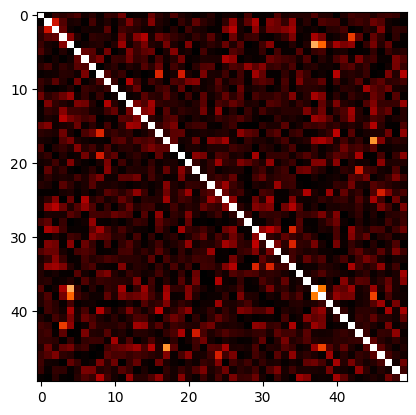

In [12]:
plt.imshow(abs(np.corrcoef(infonce50.T)), cmap='gist_heat')

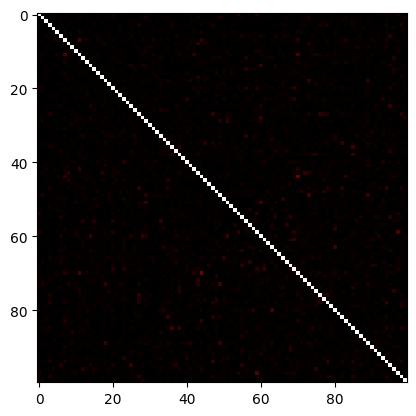

In [13]:
plt.imshow(abs(np.corrcoef(icaica1.T)), cmap='gist_heat')

In [ ]:
import ica

In [ ]:
infonce.shape

In [ ]:
data_id = os.listdir('/data/qneuromark/Data/FBIRN/Data_BIDS/Raw_Data/')
path_list = []
for i in data_id:
    nii_path = '/data/qneuromark/Data/FBIRN/Data_BIDS/Raw_Data/' + i + '/ses_01/func/SM.nii'
    path_list.append(nii_path)
    
b = nib.load(path_list[2])

In [ ]:
mixture, white, dewhite = ica.pca_whiten(infonce.T, 50)
mixture = mixture.T

In [ ]:
mixture = mixture.reshape(53,63,52,50)

In [ ]:

nifiti = np.array(mixture)
new_image = nib.Nifti1Image(nifiti, affine=b.affine, header=b.header)

In [ ]:
nib.save(new_image, '../mri_data/infonce_white.nii')